In [1]:
import os
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.layers import Input # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.layers import Dropout # type: ignore
from tensorflow.keras.layers import Flatten # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from sklearn.preprocessing import LabelBinarizer # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore
from sklearn.metrics import classification_report # type: ignore
from tensorflow.keras.layers import AveragePooling2D # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from tensorflow.keras.applications import MobileNetV2 # type: ignore
from tensorflow.keras.preprocessing.image import load_img # type: ignore
from tensorflow.keras.preprocessing.image import img_to_array # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input # type: ignore

In [ ]:
DIRECTORY = r"C:\Users\DELL\Desktop\Intern Uneeq\Face Mask Detector\face mask dataset"
CATEGORIES = ["with_mask", "without_mask"]

data = []
labels = []

In [7]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
      img_path = os.path.join(path, img)
      image = load_img(img_path, target_size=(224, 224))
      image = img_to_array(image)
      image = preprocess_input(image)

      data.append(image)
      labels.append(category)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [9]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest"
)

baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

C:\Users\DELL\AppData\Local\Temp\ipykernel_3140\2212659902.py:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 48s 5us/step


In [10]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

In [13]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

for layer in baseModel.layers:
	layer.trainable = False

opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [14]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS
)

Epoch 1/20


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 65s 642ms/step - accuracy: 0.7834 - loss: 0.5168 - val_accuracy: 0.9844 - val_loss: 0.1471
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.1878   
Epoch 3/20


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


95/95 ━━━━━━━━━━━━━━━━━━━━ 58s 600ms/step - accuracy: 0.9615 - loss: 0.1605 - val_accuracy: 0.9896 - val_loss: 0.0748
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.9688 - loss: 0.1026 
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 58s 601ms/step - accuracy: 0.9705 - loss: 0.1070 - val_accuracy: 0.9909 - val_loss: 0.0546
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 1.0000 - loss: 0.0242 
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 61s 631ms/step - accuracy: 0.9791 - loss: 0.0835 - val_accuracy: 0.9922 - val_loss: 0.0454
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 1.0000 - loss: 0.0385 
Epoch 9/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 59s 609ms/step - accuracy: 0.9783 - loss: 0.0744 - val_accuracy: 0.9922 - val_loss: 0.0412
Epoch 10/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - accuracy: 1.0000 - loss: 0.0524 
Epoch 11/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 56s 574ms/step - accuracy: 0.9842 - loss: 0.0575 - val_accuracy: 0.9909 - val_loss: 0.0383
Epoch 12/20
95/9

In [15]:
predIdxs = model.predict(testX, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 430ms/step
              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



In [17]:
model.save("mask_detector.model.h5")

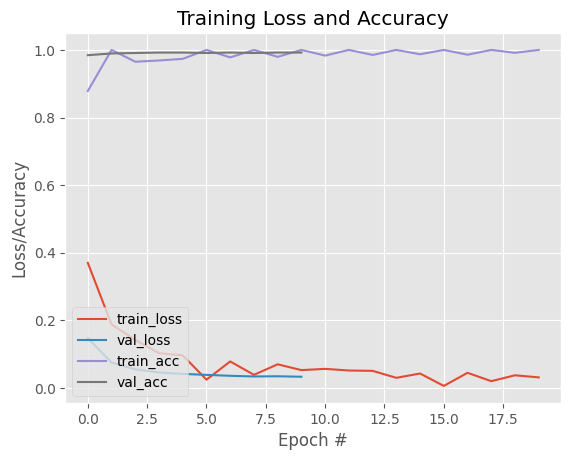

In [23]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")